# Load data

In [1]:
import pandas as pd


df_analysis=pd.read_csv(r'data\US_data\df_merged_data_for_analysis.csv')
# df_economic = pd.read_csv('data/US_data/df_economic.csv')



# # 环境维度的变量
# env_data = df_analysis[['lat', 'lon', 'predicted_prob','gmm_density','sample_type']].copy()

# # 碳减排维度的变量

# emission_data = df_analysis[['lat', 'lon', 'Expectation_net_benefit','area_m2']].copy()
# emission_data['Expectation_net_benefit'] = emission_data['Expectation_net_benefit'] * 3.67  # 单位变为MgCO2也就是吨
# emission_data = emission_data.rename(columns={'Expectation_net_benefit': 'Expectation_net_benefit'})

# # 经济维度的变量
# avg_npv = economic_2050.groupby(['lat', 'lon'])['net_npv_usd'].mean().reset_index().rename(columns={'net_npv_usd': 'avg_npv'})


# # 合并所有变量
# merged_data_for_plot = env_data.merge(emission_data, on=['lat', 'lon'], how='outer') \
#                       .merge(avg_npv, on=['lat', 'lon'], how='outer')
# merged_data_for_plot
df_analysis

,lat,lon,predicted_prob,gmm_density,sample_type,LNCS_expect,net_npv_usd,area_m2,E_yr_pixel,pv_potential_dens,power_generation_kwha,Expectation_net_benefit,ccd_optimized
0,25.295834,-80.287500,0.902568,2.806133e+19,prediction,811.854595,411724.028993,776295.361002,1.958127e+08,5568.344207,7.567199e+07,4756.489612,0.940305
1,25.437500,-80.537500,0.997976,5.399806e+21,prediction,1348.189022,287052.220262,775385.854124,1.913273e+08,5447.174926,7.402534e+07,4098.985904,0.828012
2,25.437500,-80.495834,0.995833,1.508036e+20,prediction,971.186274,278019.855286,775385.854124,1.910215e+08,5438.469092,7.390703e+07,4467.282818,0.882208
3,25.445833,-80.454170,0.990886,1.800785e+16,prediction,972.811005,272893.696918,775332.207938,1.908320e+08,5433.449375,7.383881e+07,4460.638370,0.880366
4,25.445833,-80.404170,0.996591,6.792866e+22,prediction,968.544647,294800.434504,775332.207938,1.915894e+08,5455.012162,7.413184e+07,4486.467516,0.888518
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70332,48.995834,-99.995834,0.914557,5.692829e+14,prediction,377.830800,-556486.868714,563356.382622,1.180457e+08,4625.717362,6.286200e+07,4247.886562,0.790359
70333,48.995834,-99.987500,0.921603,1.413612e+14,prediction,307.516600,-562376.609379,563356.382622,1.178997e+08,4619.997412,6.278426e+07,4312.480812,0.800732
70334,48.995834,-99.895836,0.872176,3.161397e+13,prediction,324.674320,-598319.346882,563356.382622,1.170071e+08,4585.017928,6.230891e+07,4260.343608,0.757385
70335,48.995834,-99.887500,0.799749,6.767585e+13,prediction,323.374660,-594934.043507,563356.382622,1.170906e+08,4588.290785,6.235338e+07,4264.916125,0.691242


In [2]:
import geopandas as gpd
import rioxarray
from shapely.geometry import mapping
import matplotlib.pyplot as plt
import numpy as np
from io import BytesIO



us_nation = gpd.read_file(r'data\US_data\cb_2018_us_nation_5m.shp')
us_states = gpd.read_file(r'data\cb_2018_us_state_500k.shp')
us_counties = gpd.read_file('data/cb_2018_us_county_500k.shp')


us_nation_4326 = us_nation.to_crs('EPSG:4326')
us_states_4326 = us_states.to_crs('EPSG:4326')
us_counties_4326 = us_counties.to_crs('EPSG:4326')

# 2. 读取DEM并设置CRS（如果缺失）
dem = rioxarray.open_rasterio(r'figure\draw_shp\DEM.nc', masked=True)

# 检查DEM的CRS，如果缺失则手动设置
if dem.rio.crs is None:
    # 根据DEM数据的坐标范围判断，通常全球DEM使用EPSG:4326
    print("DEM CRS缺失，设置为EPSG:4326")
    dem = dem.rio.write_crs("EPSG:4326")

# 3. 确保US nation的CRS与DEM一致
if us_nation.crs != dem.rio.crs:
    print(f"转换US nation CRS从 {us_nation.crs} 到 {dem.rio.crs}")
    us_nation = us_nation.to_crs(dem.rio.crs)



# 4. 用us_nation精确裁剪DEM
print("开始裁剪DEM（使用us_nation）...")
dem_us = dem.rio.clip(us_nation.geometry.apply(mapping), us_nation.crs, drop=True)
print("DEM裁剪完成！")





DEM CRS缺失，设置为EPSG:4326
转换US nation CRS从 EPSG:4269 到 EPSG:4326
开始裁剪DEM（使用us_nation）...
DEM裁剪完成！


# 1、Plot for bi-variable

## Help function

In [7]:


def _draw_graticule_top_labels(ax, lon_ticks, lat_ticks, usa_bounds_main, proj_fwd, proj_inv):
    """绘制经纬度网格，标签显示在上方和右方（曲线网格）"""
    def extent_lonlat_from_axes(ax, pad_deg=3):
        xmin, xmax = ax.get_xlim(); ymin, ymax = ax.get_ylim()
        xs = np.linspace(xmin, xmax, 512)
        ys = np.linspace(ymin, ymax, 512)
        
        b_lon, b_lat = proj_inv.transform(xs, np.full_like(xs, ymin))
        t_lon, t_lat = proj_inv.transform(xs, np.full_like(xs, ymax))
        l_lon, l_lat = proj_inv.transform(np.full_like(ys, xmin), ys)
        r_lon, r_lat = proj_inv.transform(np.full_like(ys, xmax), ys)
        
        lon_min = np.nanmin([b_lon.min(), t_lon.min(), l_lon.min(), r_lon.min()]) - pad_deg
        lon_max = np.nanmax([b_lon.max(), t_lon.max(), l_lon.max(), r_lon.max()]) + pad_deg
        lat_min = np.nanmin([b_lat.min(), t_lat.min(), l_lat.min(), r_lat.min()]) - pad_deg
        lat_max = np.nanmax([b_lat.max(), t_lat.max(), l_lat.max(), r_lat.max()]) + pad_deg
        
        return (lon_min, lon_max), (lat_min, lat_max)

    def _project_xy(xy):
        xs, ys = proj_fwd.transform(xy[:,0], xy[:,1])
        return np.column_stack([xs, ys])

    # 轴框与四边
    xmin, xmax = ax.get_xlim(); ymin, ymax = ax.get_ylim()
    frame = box(xmin, ymin, xmax, ymax)

    # 获取经纬度范围
    lon_ext, lat_ext = extent_lonlat_from_axes(ax, pad_deg=3)

    # 经度刻度和网格线（曲线）
    xticks = []
    for i, lon in enumerate(lon_ticks):
        lats = np.linspace(lat_ext[0], lat_ext[1], 1000)
        xy = _project_xy(np.column_stack([np.full_like(lats, lon), lats]))
        line = LineString(xy)

        # 只绘制地图内的曲线网格线，裁剪到地图区域
        clip_line = line.intersection(frame)
        if not clip_line.is_empty and clip_line.geom_type == 'LineString':
            coords = list(clip_line.coords)
            if len(coords) > 1:
                coords_array = np.array(coords)
                ax.plot(coords_array[:,0], coords_array[:,1], lw=0.3, color="#cfcfcf", zorder=0.6, alpha=0.7)

        # 只在顶部边界寻找交点
        top_edge = LineString([(xmin, ymax), (xmax, ymax)])
        intersection = line.intersection(top_edge)
        
        if not intersection.is_empty:
            if intersection.geom_type == 'Point':
                xticks.append(intersection.x)
                ax.text(intersection.x, ymax + (ymax - ymin) * 0.02, f"{abs(int(round(lon)))}°W",
                       ha='center', va='bottom', fontsize=5, zorder=20, color='#666666',
                       bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7, 
                               edgecolor='none'))
            elif intersection.geom_type == 'MultiPoint':
                # 如果交点有多个，选择最左侧的
                points = list(intersection.geoms)
                if points:
                    x_coords = [p.x for p in points]
                    min_x_idx = np.argmin(x_coords)
                    xticks.append(points[min_x_idx].x)
                    ax.text(points[min_x_idx].x, ymax + (ymax - ymin) * 0.02, f"{abs(int(round(lon)))}°W",
                           ha='center', va='bottom', fontsize=5, zorder=20, color='#666666',
                           bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7, 
                                   edgecolor='none'))

    # 纬度刻度和网格线（曲线）
    yticks = []
    for lat in lat_ticks:
        lons = np.linspace(lon_ext[0], lon_ext[1], 1000)
        xy = _project_xy(np.column_stack([lons, np.full_like(lons, lat)]))
        line = LineString(xy)

        # 只绘制地图内的曲线网格线
        clip_line = line.intersection(frame)
        if not clip_line.is_empty and clip_line.geom_type == 'LineString':
            coords = list(clip_line.coords)
            if len(coords) > 1:
                coords_array = np.array(coords)
                ax.plot(coords_array[:,0], coords_array[:,1], lw=0.3, color="#cfcfcf", zorder=0.6, alpha=0.7)

        # 只在左侧边界寻找交点
        left_edge = LineString([(xmin, ymin), (xmin, ymax)])
        intersection = line.intersection(left_edge)
        
        if not intersection.is_empty:
            if intersection.geom_type == 'Point':
                yticks.append(intersection.y)
                ax.text(xmin - (xmax - xmin) * 0.02, intersection.y, f"{int(round(lat))}°N",
                       ha='right', va='center', fontsize=5, zorder=20, color='#666666',
                       bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7,
                               edgecolor='none'))
            elif intersection.geom_type == 'MultiPoint':
                # 如果交点有多个，选择中间的
                points = list(intersection.geoms)
                if points:
                    mid_idx = len(points) // 2
                    yticks.append(points[mid_idx].y)
                    ax.text(xmin - (xmax - xmin) * 0.02, points[mid_idx].y, f"{int(round(lat))}°N",
                           ha='right', va='center', fontsize=5, zorder=20, color='#666666',
                           bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7,
                                   edgecolor='none'))
    """绘制经纬度网格，标签显示在上方和左侧（曲线网格，去除右侧标签）"""
    def extent_lonlat_from_axes(ax, pad_deg=3):
        xmin, xmax = ax.get_xlim(); ymin, ymax = ax.get_ylim()
        xs = np.linspace(xmin, xmax, 512)
        ys = np.linspace(ymin, ymax, 512)
        
        b_lon, b_lat = proj_inv.transform(xs, np.full_like(xs, ymin))
        t_lon, t_lat = proj_inv.transform(xs, np.full_like(xs, ymax))
        l_lon, l_lat = proj_inv.transform(np.full_like(ys, xmin), ys)
        r_lon, r_lat = proj_inv.transform(np.full_like(ys, xmax), ys)
        
        lon_min = np.nanmin([b_lon.min(), t_lon.min(), l_lon.min(), r_lon.min()]) - pad_deg
        lon_max = np.nanmax([b_lon.max(), t_lon.max(), l_lon.max(), r_lon.max()]) + pad_deg
        lat_min = np.nanmin([b_lat.min(), t_lat.min(), l_lat.min(), r_lat.min()]) - pad_deg
        lat_max = np.nanmax([b_lat.max(), t_lat.max(), l_lat.max(), r_lat.max()]) + pad_deg
        
        return (lon_min, lon_max), (lat_min, lat_max)

    def _project_xy(xy):
        xs, ys = proj_fwd.transform(xy[:,0], xy[:,1])
        return np.column_stack([xs, ys])

    def _choose_point_on_edge(geom):
        if geom.is_empty:
            return None
        if geom.geom_type == "Point":
            return geom
        if geom.geom_type.startswith("Multi") or geom.geom_type == "GeometryCollection":
            pts = [g for g in getattr(geom, "geoms", []) if g.geom_type == "Point"]
            return pts[0] if pts else None
        if geom.geom_type == "LineString":
            return geom.interpolate(0.5, normalized=True)
        return None

    # 轴框与四边
    xmin, xmax = ax.get_xlim(); ymin, ymax = ax.get_ylim()
    frame = box(xmin, ymin, xmax, ymax)
    left = LineString([(xmin, ymin), (xmin, ymax)])
    right = LineString([(xmax, ymin), (xmax, ymax)])  
    bottom = LineString([(xmin, ymin), (xmax, ymin)])
    top = LineString([(xmin, ymax), (xmax, ymax)])

    # 获取经纬度范围
    lon_ext, lat_ext = extent_lonlat_from_axes(ax, pad_deg=3)

    # 经度刻度和网格线（曲线）
    xticks = []
    for i, lon in enumerate(lon_ticks):
        lats = np.linspace(lat_ext[0], lat_ext[1], 1000)
        xy = _project_xy(np.column_stack([np.full_like(lats, lon), lats]))
        line = LineString(xy)

        # 绘制曲线网格线
        ax.plot(xy[:,0], xy[:,1], lw=0.3, color="#cfcfcf", zorder=0.6, alpha=0.7)

        # 在顶部显示标签
        p = _choose_point_on_edge(line.intersection(top))
        if p is None:
            p = _choose_point_on_edge(line.intersection(bottom))
        if p is not None:
            # 检查与已有标签的最小距离
            min_distance = 0.02 * (ax.get_xlim()[1] - ax.get_xlim()[0])
            if not xticks or min([abs(p.x - x) for x in xticks]) > min_distance:
                xticks.append(p.x)
                # 在上方显示标签
                ax.text(p.x, ymax + (ymax - ymin) * 0.02, f"{abs(int(round(lon)))}°W",
                       ha='center', va='bottom', fontsize=5, zorder=20, color='#666666',
                       bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7, 
                               edgecolor='none'))

    # 纬度刻度和网格线（曲线）
    yticks = []
    for lat in lat_ticks:
        lons = np.linspace(lon_ext[0], lon_ext[1], 1000)
        xy = _project_xy(np.column_stack([lons, np.full_like(lons, lat)]))
        line = LineString(xy)

        # 绘制曲线网格线
        ax.plot(xy[:,0], xy[:,1], lw=0.3, color="#cfcfcf", zorder=0.6, alpha=0.7)

        # 只在左侧显示标签（不在右侧）
        p = _choose_point_on_edge(line.intersection(left))
        if p is not None:
            yticks.append(p.y)
            ax.text(xmin - (xmax - xmin) * 0.02, p.y, f"{int(round(lat))}°N",
                   ha='right', va='center', fontsize=5, zorder=20, color='#666666',
                   bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7,
                           edgecolor='none'))



def _render_terrain(ax, dem_data, usa_bounds_main, transformer):
    """渲染地形"""
    qm = None
    dem_lon = dem_data.x.values
    dem_lat = dem_data.y.values
    lon_mask = (dem_lon >= usa_bounds_main['lon_min']) & (dem_lon <= usa_bounds_main['lon_max'])
    lat_mask = (dem_lat >= usa_bounds_main['lat_min']) & (dem_lat <= usa_bounds_main['lat_max'])
    
    if lon_mask.any() and lat_mask.any():
        lon_idx = np.where(lon_mask)[0]
        lat_idx = np.where(lat_mask)[0]
        
        # 抽稀栅格
        step_x = max(1, len(lon_idx)//1800)
        step_y = max(1, len(lat_idx)//900)
        lon_sub = lon_idx[::step_x]
        lat_sub = lat_idx[::step_y]
        elev = dem_data.squeeze().values[np.ix_(lat_sub, lon_sub)]

        mask = ~np.isnan(elev)
        if mask.any():
            lo = np.nanpercentile(elev, 35)
            elev[elev < lo] = np.nan

            # 地形配色
            terrain_colors = ListedColormap(["#ffffff", "#eef3ef", "#dfe8e0",
                                           "#d2ddcf", "#c7d1c1", "#b7c2af"])
            terrain_colors.set_bad((0, 0, 0, 0))
            qs = np.nanpercentile(elev, [35, 50, 65, 78, 88, 98])
            norm = BoundaryNorm(qs, terrain_colors.N)

            lon_grid, lat_grid = np.meshgrid(dem_lon[lon_sub], dem_lat[lat_sub])
            gx, gy = transformer.transform(lon_grid, lat_grid)            
            qm = ax.pcolormesh(gx, gy, elev, cmap=terrain_colors, norm=norm,
                              shading='auto', alpha=0.55, antialiased=False, zorder=1)
            qm.set_clip_on(True)
    
    return qm


def _draw_glow_outline_outside(ax, gdf_albers, line_color="#444444", line_width=0.8,
                              widths_km=(0, 30, 50), alphas=(0.95, 0.5, 0.3), 
                              colors=("#08336e", "#105ca4", "#3888c0")):
    """绘制国界线光晕效果"""
    g = gdf_albers.copy()
    geom = unary_union(g.geometry)
    
    if make_valid is not None:
        geom = make_valid(geom)
    else:
        geom = geom.buffer(0)

    radii_m = [k*1000.0 for k in widths_km]
    ordered = list(zip(radii_m, alphas, colors))
    ordered.sort(key=lambda x: x[0])

    last_inner = geom.buffer(0, join_style=2, cap_style=2)
    glow_meshes = []
    
    for i, (r, alpha, color) in enumerate(ordered):
        outer = geom.buffer(r, join_style=2, cap_style=2)
        ring = outer.difference(last_inner)
        if not ring.is_empty:
            glow_series = gpd.GeoSeries([ring], crs=g.crs)
            glow_mesh = glow_series.plot(ax=ax, color=color, alpha=alpha, edgecolor="none",
                                       zorder=8.2 + i*0.01)
            glow_meshes.append(glow_mesh)
        last_inner = outer

    g.boundary.plot(ax=ax, color=line_color, linewidth=line_width, zorder=9.6)
    return glow_meshes




## Plot function

C:\Users\zpy10\AppData\Local\Temp\ipykernel_44008\1111689254.py:229: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  qm = ax.pcolormesh(gx, gy, elev, cmap=terrain_colors, norm=norm,
C:\Users\zpy10\AppData\Local\Temp\ipykernel_44008\3304366845.py:174: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.draw()
C:\Users\zpy10\AppData\Local\Temp\ipykernel_44008\3304366845.py:302: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.savefig(filename_png, dpi=300, facecolor='White')
C:\Users\zpy10\AppData\Local\Temp\ipykernel_44008\3304366845.py:303: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.draw()
C:\Users\zpy10\AppData\Local\Temp\ipykernel_44008\3304366845.py:304: UserWarning: Glyph 8322 (\N{S

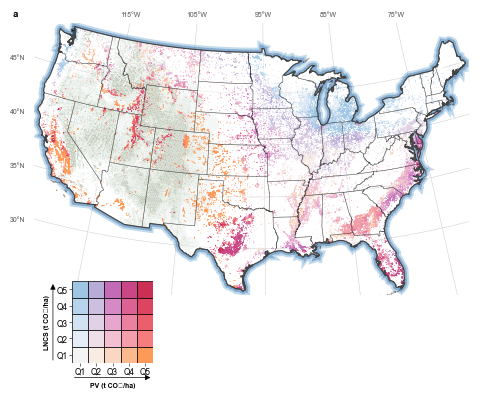

双变量地图生成完成！


In [20]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import geopandas as gpd
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm, LinearSegmentedColormap
from pyproj import Transformer
from shapely.geometry import box, LineString
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from shapely.ops import unary_union
try:
    from shapely import make_valid
except Exception:
    make_valid = None
import matplotlib as mpl
import matplotlib.ticker as mticker
from shapely.validation import make_valid
from shapely.ops import transform as shp_transform

def plot_bivariate_nature_style(
    emission_data_merge, 
    us_nation_gdf,
    us_states_gdf, 
    dem_data, 
    var1_name='pv_potential_total(t)',
    var2_name='LNCS_expect',
    title1='Carbon Mitigation Potential',
    title2='Land Use Change Cost',
    unit1='MgC/ha',
    unit2='MgC/ha',
):
    """
    绘制双变量地图，Nature风格，3×3马赛克颜色条
    """
    # ==================== 1. 初始设置 ====================
    plt.rcParams.update({
        'font.size': 5, 'axes.titlesize': 5, 'axes.labelsize': 5,
        'xtick.labelsize': 5, 'ytick.labelsize': 5, 'legend.fontsize': 5,
        'font.family': 'Arial'
    })

    # 创建图形和坐标轴 - 保持figsize不变
    fig, ax = plt.subplots(1, 1, figsize=(130/25.4, 110/25.4))
    ax.set_autoscale_on(False)
    fig.patch.set_facecolor('white')      
    ax.set_facecolor('white')

    # ==================== 2. 地理边界设置 ====================
    usa_bounds_main = {'lon_min': -125, 'lon_max': -65, 'lat_min': 24, 'lat_max': 51}
    bbox = box(usa_bounds_main['lon_min'], usa_bounds_main['lat_min'],
               usa_bounds_main['lon_max'], usa_bounds_main['lat_max'])


    # 处理国界数据
    if isinstance(us_nation_gdf, gpd.GeoDataFrame):
        geom = us_nation_gdf.geometry.iloc[0]
    else:
        geom = us_nation_gdf

    geom = make_valid(geom)

    if geom.geom_type == "MultiPolygon":
        transformer_4326_to_alb = Transformer.from_crs("EPSG:4326", "ESRI:102003", always_xy=True).transform
        areas = [shp_transform(transformer_4326_to_alb, p).area for p in geom.geoms]
        geom = list(geom.geoms)[int(np.argmax(areas))]

    # Wrap the (possibly Multi-)Polygon in a GeoSeries for CRS handling
    us_nation_geom_4326 = gpd.GeoSeries([geom], crs="EPSG:4326")
    us_nation_albers = us_nation_geom_4326.to_crs("ESRI:102003")
    
    # 处理州界线
    us_states_bound = us_states_gdf.to_crs(epsg=4326).clip(bbox)    
    us_states_albers = us_states_bound.to_crs('ESRI:102003')

    # 处理外框边界
    usa_bounds_main_box = box(
        usa_bounds_main['lon_min'] , usa_bounds_main['lat_min'] ,
        usa_bounds_main['lon_max'] , usa_bounds_main['lat_max'] 
    )
    usa_bounds_main_albers = gpd.GeoSeries([usa_bounds_main_box], crs="EPSG:4326").to_crs('ESRI:102003')

    xmin, ymin, xmax, ymax = us_nation_albers.total_bounds
    margin_left = 40000.0   # 单独设置左侧 (xmin) 的 margin
    margin_right = 40000.0  # 单独设置右侧 (xmax) 的 margin
    ax.set_xlim(xmin - margin_left, xmax + margin_right)
    ax.set_ylim(ymin - 40000.0, ymax + 40000.0)
    ax.set_position([0.07, 0.1, 0.85, 0.9])
    # ax.set_position([0.1, 0.1, 0.8, 0.8])


    


    # ==================== 3. 坐标变换设置 ====================
    transformer = Transformer.from_crs("EPSG:4326", "ESRI:102003", always_xy=True)
    proj_fwd = Transformer.from_crs("EPSG:4326", "ESRI:102003", always_xy=True)
    proj_inv = Transformer.from_crs("ESRI:102003", "EPSG:4326", always_xy=True)



    # ==================== 5. 数据坐标转换 ====================
    x_proj, y_proj = transformer.transform(emission_data_merge['lon'].values, 
                                          emission_data_merge['lat'].values)

    # ==================== 6. 地形渲染 ====================
    qm = _render_terrain(ax, dem_data, usa_bounds_main, transformer)

    # ==================== 7. 地图元素绘制 ====================
    # 绘制国界线光晕效果
    _draw_glow_outline_outside(ax, us_nation_albers)
    
    # 绘制州界
    us_states_albers.plot(ax=ax, color='none', edgecolor='black', linewidth=0.4, alpha=0.4, zorder=9)

    ax.set_xticks([])
    ax.set_yticks([])

    # ==================== 8. 坐标轴设置 ====================
    
    for spine in ax.spines.values():
        spine.set_visible(False)

    lon_ticks = np.arange(-115, -65, 10)
    lat_ticks = [ 30,35,40,45]
    proj_fwd = Transformer.from_crs("EPSG:4326", "ESRI:102003", always_xy=True)
    proj_inv = Transformer.from_crs("ESRI:102003", "EPSG:4326", always_xy=True)
    _draw_graticule_top_labels(ax, lon_ticks, lat_ticks, usa_bounds_main, proj_fwd, proj_inv)

    # ==================== 9. 背景地图 ====================
    # _draw_background_map(ax, usa_bounds_main)


    # ==================== 10. 双变量数据可视化 ====================
    # 获取两个变量的数据
    var1_values = np.asarray(emission_data_merge[var1_name].values, dtype=float)
    var2_values = np.asarray(emission_data_merge[var2_name].values, dtype=float)
    
    # 移除NaN值
    valid_mask = ~(np.isnan(var1_values) | np.isnan(var2_values))
    var1_values = var1_values[valid_mask]
    var2_values = var2_values[valid_mask]
    x_proj_valid = x_proj[valid_mask]
    y_proj_valid = y_proj[valid_mask]
    

    # 创建3×3马赛克颜色方案
    palette = create_bivariate_colormap_5x5()
    
    # 为每个点分配马赛克类别
    var1_quintiles = np.percentile(var1_values, np.linspace(0, 100, 6))
    var2_quintiles = np.percentile(var2_values, np.linspace(0, 100, 6))

    var1_categories = np.digitize(var1_values, var1_quintiles[1:-1])  # 0–4
    var2_categories = np.digitize(var2_values, var2_quintiles[1:-1])  # 0–4
    
    # 创建颜色映射
    var1_bins = var1_quintiles[1:-1]  # length = 4
    var2_bins = var2_quintiles[1:-1]

    var1_cat = np.clip(np.digitize(var1_values, var1_bins), 0, 4)
    var2_cat = np.clip(np.digitize(var2_values, var2_bins), 0, 4)

    mosaic_idx = var1_cat * 5 + var2_cat   # 5 columns per row
    colors = [palette[idx] for idx in mosaic_idx]
    
    # 绘制散点
    scatter = ax.scatter(x_proj_valid, y_proj_valid, c=colors, s=0.35, alpha=0.95, 
                        edgecolors='none', zorder=5)

    # ==================== 11. 3×3马赛克颜色条 ====================
    _add_bivariate_colorbar_5x5(fig, ax, var1_quintiles, var2_quintiles,
                                title1, title2, unit1, unit2)

    # ==================== 12. 最终处理 ====================
    fig.canvas.draw()          
    if qm is not None:
        qm.set_clip_path(ax.patch)
        qm.set_rasterized(True)

    return fig, ax


import colorsys

def create_bivariate_colormap_5x5(style: str = "blue_orange_strong"):
    if style == "green_purple_strong":
        return [
            "#F1F5E6", "#E5E3EE", "#D8D0F2", "#C5B6E8", "#B28BD4",
            "#DCEEC9", "#CFE0D5", "#C3D2E0", "#B5C2E0", "#A2ACD8",
            "#C4E2A6", "#B4D3B5", "#A5C3C5", "#94B0C7", "#8297BF",
            "#AAC878", "#9CB883", "#8EA792", "#7C939A", "#697A94",
            "#8AA54C", "#7E945B", "#72836A", "#627177", "#505E73",
        ]
    if style == "teal_magenta":
        # 行：PV 由低→高；列：LNCS 由低→高（row-major）
        return [
            "#F5F6F7","#E6EFF2","#D5E7EC","#C2DEE5","#ADD4DE",
            "#F4EEF4","#E7E3F1","#D8D6ED","#C7C7E7","#B4B6DF",
            "#F7E4F5","#EBCDEB","#DEB4E0","#CF98D4","#BE7BC7",
            "#F9D7F4","#F0BDEB","#E49EE0","#D47BD2","#C556C2",
            "#FBCDF3","#F2B0EE","#E58FE6","#D46BDA","#C246CB",
        ]
    if style == "blue_orange_strong":
        return [
            "#F4F4F4","#E5EEF8","#D1E3F3","#B8D4EC","#9EC6E4",
            "#F9ECE3","#EEDFE8","#E0D1E6","#CDBFE0","#B7ABD7",
            "#FAD7C2","#F2C0D0","#E6A6CD","#D589C5","#C46BB8",
            "#FCB98E","#F59EAB","#EA81A1","#DB6293","#CA4785",
            "#FD9A57","#F67C7E","#EB5F6C","#DC445F","#CC2F54",
        ]
    raise ValueError(f"Unknown style: {style}")





def _add_bivariate_colorbar_5x5(fig, ax, var1_quintiles, var2_quintiles,
                                title1, title2, unit1, unit2):
    from matplotlib.patches import FancyArrowPatch

    pos = ax.get_position()
    # Keep the overall width the same
    mosaic_left  = pos.x0 + 0.08 * pos.width   # same horizontal anchor
    mosaic_size  = 0.20 * pos.width            # keep width constant

    mosaic_bottom = pos.y0 - 0.25 * pos.height   # was 0.06
    mosaic_height = 0.30 * pos.height            # was 0.30

    mosaic_ax = fig.add_axes(
        [mosaic_left, mosaic_bottom, mosaic_size, mosaic_height],
        zorder=30
    )
    mosaic_ax.set_xlim(0, 5)
    mosaic_ax.set_ylim(0, 5)
    mosaic_ax.set_aspect('equal')

    palette = create_bivariate_colormap_5x5()
    for i in range(5):        # var1: LOW → HIGH (x axis)
        for j in range(5):    # var2: LOW → HIGH (y axis)
            color_idx = j + i * 5
            rect = plt.Rectangle((i, j), 1, 1, facecolor=palette[color_idx],
                                 edgecolor='black', linewidth=0.5)
            mosaic_ax.add_patch(rect)

    mosaic_ax.set_xticks(np.arange(0.5, 5.0, 1.0))
    mosaic_ax.set_yticks(np.arange(0.5, 5.0, 1.0))
    mosaic_ax.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4', 'Q5'], fontsize=6)
    mosaic_ax.set_yticklabels(['Q1', 'Q2', 'Q3', 'Q4', 'Q5'], fontsize=6)
    mosaic_ax.tick_params(axis='both', which='major',
                          pad=1.2, length=2, width=0.4, labelsize=6)

    arrow_x = FancyArrowPatch((0.0, -0.18), (1.0, -0.18),
                              transform=mosaic_ax.transAxes, clip_on=False,
                              arrowstyle='-|>', mutation_scale=8,
                              linewidth=0.5, color='black')
    mosaic_ax.add_artist(arrow_x)
    arrow_y = FancyArrowPatch((-0.23, 0.0), (-0.23, 1.0),
                              transform=mosaic_ax.transAxes, clip_on=False,
                              arrowstyle='-|>', mutation_scale=8,
                              linewidth=0.5, color='black')
    mosaic_ax.add_artist(arrow_y)

    mosaic_ax.text(0.5, -0.23, f'{title1} ({unit1})',
                   transform=mosaic_ax.transAxes, ha='center', va='top',
                   fontsize=5, fontweight='bold')
    mosaic_ax.text(-0.35, 0.5, f'{title2} ({unit2})',
                   transform=mosaic_ax.transAxes, ha='left', va='center',
                   fontsize=5, fontweight='bold', rotation=90)

    for spine in mosaic_ax.spines.values():
        spine.set_visible(False)

# ==================== 主程序 ====================
# 使用示例
try:
    # 转换：1 t C = 3.67 t CO2，先拷贝一份数据，避免覆盖原数据
    df_plot = df_analysis.copy()
    df_plot['pv_potential_dens_co2'] = df_plot['pv_potential_dens'] * 3.67
    df_plot['LNCS_expect_co2'] = df_plot['LNCS_expect'] * 3.67

    fig, ax = plot_bivariate_nature_style(
        df_plot, 
        us_nation_4326,
        us_states_4326, 
        dem_us,
        var1_name='pv_potential_dens_co2',
        var2_name='LNCS_expect_co2',
        title1='PV',
        title2='LNCS',
        unit1='t CO₂/ha',
        unit2='t CO₂/ha',
    )

    # 添加面板标签
    ax.text(-0.05, 1.05, 'a', transform=ax.transAxes,
            ha='left', va='top', fontsize=7, fontweight='bold',
            bbox=dict(facecolor='white', alpha=0.7, pad=0.2, lw=0), zorder=100)

    # 保存图片
    filename_png = "figure/US_figure/bivariate_emission_lucs_nature_style_300dpi.png"
    filename_pdf = "figure/US_figure/bivariate_emission_lucs_nature_style_300dpi.pdf"
    
    fig.savefig(filename_png, dpi=300, facecolor='White')  
    fig.canvas.draw()
    fig.savefig(filename_pdf, dpi=300, facecolor='None')                       

    plt.show()
    plt.close(fig)
    
    print("双变量地图生成完成！")

except Exception as e:
    print(f"生成双变量地图时出错: {e}")

# 2、Distribution of bi-vaiable

In [160]:
df_analysis

,lat,lon,predicted_prob,gmm_density,sample_type,LNCS_expect,net_npv_usd,area_m2,E_yr_pixel,pv_potential_dens,power_generation_kwha,Expectation_net_benefit,ccd_optimized
0,25.295834,-80.287500,0.902568,2.806133e+19,prediction,811.854595,411724.028993,776295.361002,1.958127e+08,5568.344207,7.567199e+07,4756.489612,0.940305
1,25.437500,-80.537500,0.997976,5.399806e+21,prediction,1348.189022,287052.220262,775385.854124,1.913273e+08,5447.174926,7.402534e+07,4098.985904,0.828012
2,25.437500,-80.495834,0.995833,1.508036e+20,prediction,971.186274,278019.855286,775385.854124,1.910215e+08,5438.469092,7.390703e+07,4467.282818,0.882208
3,25.445833,-80.454170,0.990886,1.800785e+16,prediction,972.811005,272893.696918,775332.207938,1.908320e+08,5433.449375,7.383881e+07,4460.638370,0.880366
4,25.445833,-80.404170,0.996591,6.792866e+22,prediction,968.544647,294800.434504,775332.207938,1.915894e+08,5455.012162,7.413184e+07,4486.467516,0.888518
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70332,48.995834,-99.995834,0.914557,5.692829e+14,prediction,377.830800,-556486.868714,563356.382622,1.180457e+08,4625.717362,6.286200e+07,4247.886562,0.790359
70333,48.995834,-99.987500,0.921603,1.413612e+14,prediction,307.516600,-562376.609379,563356.382622,1.178997e+08,4619.997412,6.278426e+07,4312.480812,0.800732
70334,48.995834,-99.895836,0.872176,3.161397e+13,prediction,324.674320,-598319.346882,563356.382622,1.170071e+08,4585.017928,6.230891e+07,4260.343608,0.757385
70335,48.995834,-99.887500,0.799749,6.767585e+13,prediction,323.374660,-594934.043507,563356.382622,1.170906e+08,4588.290785,6.235338e+07,4264.916125,0.691242


新的绘制方案：

创建两个图,subplot，总体的figsieze控制width 70mm, heitht 40mm 
左图：left spine 作为Y轴，表示数据密度；bottom spine 作为x轴，表示pv_potential_dens
使用fancy arrow 箭头 （箭头朝向右侧）

右图：right spine 作为Y轴，表示数据密；bottom spine 作为x轴，表示LNCS_expect，使用使用fancy arrow 箭头 （箭头朝向左侧）



In [161]:
def plot_weighted_density_subplots(df_analysis,
                                   pv_col='pv_potential_dens',
                                   lncs_col='LNCS_expect',
                                   figsize_mm=(70, 40),
                                   save_path=None):
    from scipy.stats import gaussian_kde
    import matplotlib.pyplot as plt
    import numpy as np
    from matplotlib.patches import FancyArrowPatch

    # -------------- 1. 数据准备（不做面积加权） --------------
    sel = df_analysis[[pv_col, lncs_col]].dropna()
    if sel.empty:
        raise ValueError("输入数据为空或存在 NaN。")

    pv_vals   = sel[pv_col].to_numpy()
    lncs_vals = sel[lncs_col].to_numpy()
    weights = df_analysis['area_m2'].to_numpy() / 10000.0  # ha
    values = df_analysis[pv_col].to_numpy()

    # choose bins along PV
    bins = np.linspace(values.min(), values.max(), 40)

    area_per_bin, _ = np.histogram(values, bins=bins, weights=weights)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])

    # KDE
    kde_pv   = gaussian_kde(pv_vals, weights=None)
    kde_lncs = gaussian_kde(lncs_vals, weights=None)

    # 1%–99% 裁剪并作为坐标范围
    pv_lo, pv_hi     = np.percentile(pv_vals,   [1, 99])
    lncs_lo, lncs_hi = np.percentile(lncs_vals, [1, 99])

    x_pv    = np.linspace(pv_lo,   pv_hi,   400)
    x_lncs  = np.linspace(lncs_lo, lncs_hi, 400)
    y_pv    = kde_pv(x_pv)
    y_lncs  = kde_lncs(x_lncs)

    y_pv_max = y_pv.max()
    y_lncs_max = y_lncs.max()



    width_in, height_in = figsize_mm[0]/25.4, figsize_mm[1]/25.4

    # 如果想要严格对齐，需要 sharey=True
    fig, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(width_in, height_in))
    plt.rcParams.update({
        'font.size': 5, 'axes.labelsize': 5,
        'xtick.labelsize': 5, 'ytick.labelsize': 5,
        'legend.fontsize': 5, 'font.family': 'Arial'
    })
    fig.subplots_adjust(left=0.12, right=0.98, top=0.88, bottom=0.25, wspace=0.25)

    # Left: PV density
    ax_left.plot(x_pv, y_pv, color="#1565C0", lw=1.0)
    ax_left.fill_between(x_pv, 0, y_pv, color="#B3E5FC", alpha=0.35)
    ax_left.set_xlim(pv_lo, pv_hi*1.05)
    ax_left.set_ylim(0, y_pv_max * 1.05)
    ax_left.set_xlabel("PV potential")
    ax_left.set_ylabel("Density", color="#1565C0")
    ax_left.tick_params(axis='y', colors="#1565C0")
    ax_left.spines['top'].set_visible(False)
    ax_left.spines['right'].set_visible(False)

    # x轴箭头向右
    # 继续向右平移箭头位置
    # 统一箭头长度和比例
    arrow_length_frac = 0.06  # 两个箭头长度相同（均为坐标轴长度的6%）
    pv_arrow_start = pv_hi + (pv_hi - pv_lo) * 0.11
    pv_arrow_end   = pv_arrow_start + (pv_hi - pv_lo) * arrow_length_frac
    arrow_pv_x = FancyArrowPatch(
        (pv_arrow_start, 0), 
        (pv_arrow_end, 0),
        transform=ax_left.get_xaxis_transform(),
        clip_on=False, arrowstyle='simple', color="black", mutation_scale=8)
    ax_left.add_patch(arrow_pv_x)

    # y轴箭头向上
    arrow_pv_y = FancyArrowPatch(
        (0.0, 1.0), (0.0, 1.08),        # y-axis coordinates, no data units
        transform=ax_left.transAxes,    # axes-fraction coordinates
        clip_on=False,
        arrowstyle='simple',
        color="black",
        mutation_scale=8
    )
    ax_left.add_patch(arrow_pv_y)

    # Right: LNCS density
    ax_right.plot(x_lncs, y_lncs, color="#E65100", lw=1.0)
    ax_right.fill_between(x_lncs, 0, y_lncs, color="#FFE0B2", alpha=0.35)
    ax_right.set_xlim(lncs_hi*1.05, lncs_lo)  # 倒序显示
    ax_right.set_ylim(0, y_lncs_max * 1.05)
    ax_right.set_xlabel("LNCS expectation")
    ax_right.tick_params(axis='y', colors="#E65100")
    ax_right.set_ylabel("Density", color="#E65100")
    ax_right.yaxis.tick_right()
    ax_right.yaxis.set_label_position("right")
    ax_right.spines['top'].set_visible(False)
    ax_right.spines['left'].set_visible(False)

    lncs_arrow_length = (lncs_hi - lncs_lo) * arrow_length_frac
    lncs_offset = (lncs_hi - lncs_lo) * -0.1  # 与左一致，右向外偏移
    lncs_arrow_start = lncs_hi - lncs_arrow_length - lncs_offset
    lncs_arrow_end   = lncs_hi - lncs_offset
    arrow_lncs_x = FancyArrowPatch(
        (lncs_arrow_start, 0), (lncs_arrow_end, 0),
        transform=ax_right.get_xaxis_transform(),
        clip_on=False,
        arrowstyle='simple',
        color="black",
        mutation_scale=8
    )
    ax_right.add_patch(arrow_lncs_x)

    arrow_lncs_y = FancyArrowPatch(
        (1.0, 1.0), (1.0, 1.08),        # x = 1 sits on the right spine
        transform=ax_right.transAxes,
        clip_on=False,
        arrowstyle='simple',
        color="black",
        mutation_scale=8
    )
    ax_right.add_patch(arrow_lncs_y)

    fig.patch.set_facecolor('white')
    if save_path:
        fig.savefig(save_path, dpi=300, facecolor='white')
        print(f"✅ 分布子图已保存: {save_path}")
    return fig, (ax_left, ax_right)



✅ 分布子图已保存: figure/US_figure/weighted_density_subplots.png


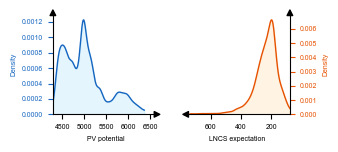

In [162]:
fig, (ax_l, ax_r) = plot_weighted_density_subplots(df_analysis,
    save_path="figure/US_figure/weighted_density_subplots.png")

## Version 2 

In [203]:
def plot_weighted_density_subplots(df_analysis,
                                   pv_col='pv_potential_dens',
                                   lncs_col='LNCS_expect',
                                   area_col='area_m2',
                                   figsize_mm=(70, 45),
                                   bins_count=30,
                                   save_path=None):
    """
    双子图：左图为 PV 潜力的面积分布，右图为 LNCS 的面积分布。
    每个子图展示：
      1. 面积加权直方图（单位 ha）
      2. KDE 拟合曲线，按面积权重缩放到同一尺度 (ha)
    """

    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.patches import FancyArrowPatch
    from scipy.stats import gaussian_kde

    # ---- 1. 数据准备 ----
    sel = df_analysis[[pv_col, lncs_col, area_col]].dropna()
    if sel.empty:
        raise ValueError("输入数据为空或存在 NaN。")

    area_ha = sel[area_col].to_numpy() / 10000.0  # m² → ha
    pv_vals = sel[pv_col].to_numpy()
    lncs_vals = sel[lncs_col].to_numpy()

    # 1%–99% 范围，处理离群值
    pv_lo, pv_hi = np.percentile(pv_vals, [1, 99])
    lncs_lo, lncs_hi = np.percentile(lncs_vals, [1, 99])

    def area_hist_and_kde(values, weights, lo, hi, n_bins):
        bins = np.linspace(lo, hi, n_bins + 1)
        totals, _ = np.histogram(values, bins=bins, weights=weights)
        centers = 0.5 * (bins[1:] + bins[:-1])

        # KDE (权重=面积)
        kde = gaussian_kde(values, weights=weights)
        x = np.linspace(lo, hi, 400)
        band = bins[1] - bins[0]  # 等宽 bins
        y = kde(x) * weights.sum() * band  # 密度转化为面积
        return centers, totals, bins, x, y

    pv_centers, pv_totals, pv_bins, pv_x, pv_kde = area_hist_and_kde(
        pv_vals, area_ha, pv_lo, pv_hi, bins_count)
    lncs_centers, lncs_totals, lncs_bins, lncs_x, lncs_kde = area_hist_and_kde(
        lncs_vals, area_ha, lncs_lo, lncs_hi, bins_count)

    # Y轴全部除以1000（kha单位）
    pv_totals_kha = pv_totals / 1000.0
    pv_kde_kha = pv_kde / 1000.0
    lncs_totals_kha = lncs_totals / 1000.0
    lncs_kde_kha = lncs_kde / 1000.0

    # ---- 2. 画布设置 ----
    width_in, height_in = figsize_mm[0] / 25.4, figsize_mm[1] / 25.4
    fig, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(width_in, height_in))
    plt.rcParams.update({
        'font.size': 5, 'axes.labelsize': 5,
        'xtick.labelsize': 5, 'ytick.labelsize': 5,
        'legend.fontsize': 5, 'font.family': 'Arial'
    })
    fig.subplots_adjust(left=0.12, right=0.98, top=0.88, bottom=0.25, wspace=0.12)

    # ---- 3. 左图：PV ----
    bar_width = np.diff(pv_bins)
    ax_left.bar(pv_centers, pv_totals_kha, width=bar_width, align='center',
                color="#B3E5FC", edgecolor='none', alpha=0.7)
    ax_left.plot(pv_x, pv_kde_kha, color="#1565C0", lw=1.0)
    ax_left.set_xlim(pv_lo, pv_hi*1.05)
    ax_left.set_ylim(0, max(pv_totals_kha.max(), pv_kde_kha.max()) * 1.1)
    ax_left.set_xlabel("PV potential", fontweight='bold')
    ax_left.set_ylabel("Area (kha)", color="#1565C0", labelpad=2)
    ax_left.tick_params(axis='y', colors="#1565C0")
    ax_left.spines['top'].set_visible(False)
    ax_left.spines['right'].set_visible(False)

    # x箭头（右）
    arrow_len = (pv_hi - pv_lo) * 0.06
    arrow_offset = (pv_hi - pv_lo) * 0.13
    arrow_pv_x = FancyArrowPatch(
        (pv_hi + arrow_offset, 0),
        (pv_hi + arrow_offset + arrow_len, 0),
        transform=ax_left.get_xaxis_transform(),
        clip_on=False, arrowstyle='simple', color='black', mutation_scale=8)
    ax_left.add_patch(arrow_pv_x)
    # y箭头（上）
    arrow_pv_y = FancyArrowPatch(
        (0.0, 1.0), (0.0, 1.08),
        transform=ax_left.transAxes,
        clip_on=False, arrowstyle='simple', color='black', mutation_scale=8)
    ax_left.add_patch(arrow_pv_y)

    # ---- 4. 右图：LNCS ----
    bar_width_lncs = np.diff(lncs_bins)
    ax_right.bar(lncs_centers, lncs_totals_kha, width=bar_width_lncs, align='center',
                 color="#FFE0B2", edgecolor='none', alpha=0.7)
    ax_right.plot(lncs_x, lncs_kde_kha, color="#E65100", lw=1.0)
    ax_right.set_xlim(lncs_hi*1.05, lncs_lo)  # 倒序
    ax_right.set_ylim(0, max(lncs_totals_kha.max(), lncs_kde_kha.max()) * 1.05)
    ax_right.set_xlabel("LNCS expectation", fontsize=5,fontweight='bold')
    ax_right.tick_params(axis='y', colors="#E65100")
    ax_right.set_ylabel("Area (kha)", color="#E65100", labelpad=2)
    ax_right.yaxis.tick_right()
    ax_right.yaxis.set_label_position("right")
    ax_right.spines['top'].set_visible(False)
    ax_right.spines['left'].set_visible(False)

    lncs_arrow_len = (lncs_hi - lncs_lo) * 0.06
    lncs_offset = (lncs_hi - lncs_lo) * (-0.05)

    arrow_lncs_x = FancyArrowPatch(
        (lncs_hi - lncs_offset, 0),
        (lncs_hi - lncs_offset + lncs_arrow_len, 0),
        transform=ax_right.get_xaxis_transform(),
        clip_on=False, arrowstyle='simple', color='black', mutation_scale=8)
    ax_right.add_patch(arrow_lncs_x)
    arrow_lncs_y = FancyArrowPatch(
        (1.0, 1.0), (1.0, 1.08),
        transform=ax_right.transAxes,
        clip_on=False, arrowstyle='simple', color='black', mutation_scale=8)
    ax_right.add_patch(arrow_lncs_y)

    fig.patch.set_facecolor('white')
    if save_path:
        fig.tight_layout()
        fig.savefig(save_path, dpi=300, facecolor='white')
        print(f"✅ 分布子图已保存: {save_path}")
    return fig, (ax_left, ax_right)

✅ 分布子图已保存: figure/US_figure/weighted_density_subplots_area.png


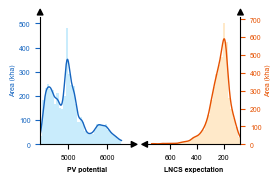

In [204]:
fig, (ax_l, ax_r) = plot_weighted_density_subplots(
    df_analysis,
    bins_count=35,
    save_path="figure/US_figure/weighted_density_subplots_area.png"
)

# DD function

In [21]:
# def _render_terrain(ax, dem_data, usa_bounds_main, transformer):
#     """渲染地形"""
#     qm = None
#     dem_lon = dem_data.x.values
#     dem_lat = dem_data.y.values
#     lon_mask = (dem_lon >= usa_bounds_main['lon_min']) & (dem_lon <= usa_bounds_main['lon_max'])
#     lat_mask = (dem_lat >= usa_bounds_main['lat_min']) & (dem_lat <= usa_bounds_main['lat_max'])
    
#     if lon_mask.any() and lat_mask.any():
#         lon_idx = np.where(lon_mask)[0]
#         lat_idx = np.where(lat_mask)[0]
        
#         # 抽稀栅格
#         step_x = max(1, len(lon_idx)//1800)
#         step_y = max(1, len(lat_idx)//900)
#         lon_sub = lon_idx[::step_x]
#         lat_sub = lat_idx[::step_y]
#         elev = dem_data.squeeze().values[np.ix_(lat_sub, lon_sub)]

#         mask = ~np.isnan(elev)
#         if mask.any():
#             lo = np.nanpercentile(elev, 35)
#             elev[elev < lo] = np.nan

#             # 地形配色
#             terrain_colors = ListedColormap(["#ffffff", "#eef3ef", "#dfe8e0",
#                                            "#d2ddcf", "#c7d1c1", "#b7c2af"])
#             terrain_colors.set_bad((0, 0, 0, 0))
#             qs = np.nanpercentile(elev, [35, 50, 65, 78, 88, 98])
#             norm = BoundaryNorm(qs, terrain_colors.N)

#             lon_grid, lat_grid = np.meshgrid(dem_lon[lon_sub], dem_lat[lat_sub])
#             gx, gy = transformer.transform(lon_grid, lat_grid)            
#             qm = ax.pcolormesh(gx, gy, elev, cmap=terrain_colors, norm=norm,
#                               shading='auto', alpha=0.55, antialiased=False, zorder=1)
#             qm.set_clip_on(True)
    
#     return qm


# def _draw_glow_outline_outside(ax, gdf_albers, line_color="#444444", line_width=0.8,
#                               widths_km=(0, 30, 50), alphas=(0.95, 0.5, 0.3), 
#                               colors=("#08336e", "#105ca4", "#3888c0")):
#     """绘制国界线光晕效果"""
#     g = gdf_albers.copy()
#     geom = unary_union(g.geometry)
    
#     if make_valid is not None:
#         geom = make_valid(geom)
#     else:
#         geom = geom.buffer(0)

#     radii_m = [k*1000.0 for k in widths_km]
#     ordered = list(zip(radii_m, alphas, colors))
#     ordered.sort(key=lambda x: x[0])

#     last_inner = geom.buffer(0, join_style=2, cap_style=2)
#     glow_meshes = []
    
#     for i, (r, alpha, color) in enumerate(ordered):
#         outer = geom.buffer(r, join_style=2, cap_style=2)
#         ring = outer.difference(last_inner)
#         if not ring.is_empty:
#             glow_series = gpd.GeoSeries([ring], crs=g.crs)
#             glow_mesh = glow_series.plot(ax=ax, color=color, alpha=alpha, edgecolor="none",
#                                        zorder=8.2 + i*0.01)
#             glow_meshes.append(glow_mesh)
#         last_inner = outer

#     g.boundary.plot(ax=ax, color=line_color, linewidth=line_width, zorder=9.6)
#     return glow_meshes



# def _draw_background_map(ax, usa_bounds_main):
#     """绘制背景地图"""
#     try:
#         bbox_expanded = box(
#             usa_bounds_main['lon_min'] - 3, usa_bounds_main['lat_min'] - 3,
#             usa_bounds_main['lon_max'] + 3, usa_bounds_main['lat_max'] + 3
#         )
#         helper_gdf = gpd.read_file(r'figure\draw_shp\ne_110m_land.shp').to_crs(4326)
#         helper_gdf = helper_gdf.clip(bbox_expanded)
        
#         if 'featurecla' in helper_gdf.columns:
#             helper_gdf = helper_gdf[helper_gdf['featurecla'].str.contains('Land', na=False)]
        
#         if make_valid is not None:
#             helper_gdf['geometry'] = helper_gdf.geometry.map(make_valid)
#         else:
#             helper_gdf['geometry'] = helper_gdf.geometry.buffer(0)
            
#         helper_gdf = helper_gdf[helper_gdf.geometry.geom_type.isin(['Polygon', 'MultiPolygon'])]
#         helper_gdf = helper_gdf.explode(index_parts=False, ignore_index=True)
#         helper_gdf_proj = helper_gdf.to_crs('ESRI:102003')
#         helper_gdf_proj['geometry'] = helper_gdf_proj.buffer(0)
#         helper_gdf_proj.plot(ax=ax, facecolor='white', edgecolor='lightgray',
#                            linewidth=0.3, alpha=1, zorder=0.5)
#     except Exception as e:
#         print(f"Helper map error: {e}")

# def _add_colorbar(fig, ax, scatter, var_bins, variable_name, unit, var_values, colors):
#     """添加颜色条到背景地图下方，并在上方显示数据分布曲线+柱状图"""
#     def add_horizontal_cbar_equiv(fig, ax, mappable, var_bins, variable_name, unit_display=None, var_values=None, colors=None):
#         # 获取主地图位置
#         pos = ax.get_position()
        
#         # colorbar放在底部，背景地图下方
#         left = pos.x0 + 0.2 * pos.width
#         bottom = 0.05  # 固定在底部
#         width = 0.55 * pos.width
#         height = 0.035  # colorbar高度

#         cax = fig.add_axes([left, bottom, width, height])
#         cax.set_in_layout(False)
#         cax.set_zorder(50)  
#         cb = fig.colorbar(mappable, cax=cax, orientation='horizontal')

#         cb.set_ticks(var_bins[1::2])

#         # 格式化刻度标签
#         tick_vals = var_bins[1::2]
#         if variable_name == 'avg_npv':
#             tick_labels = [f'{v/1_000:.2f}' for v in tick_vals]
#         elif variable_name == 'predicted_prob':
#             tick_labels = [f'{v:.2f}' for v in tick_vals]
#         elif variable_name == 'Expectation_net_benefit':
#             tick_labels = [f'{v/1_000:.2f}' for v in tick_vals]
#         else:
#             tick_labels = [f'{v:.0f}' for v in tick_vals]
#         cb.set_ticklabels(tick_labels)

#         # 细长
#         cax.tick_params(axis='x', which='major', length=2.5, width=0.5, pad=1, labelsize=5)
#         cax.tick_params(axis='x', which='minor', length=1.5, width=0.4, label1On=False)
#         cb.outline.set_linewidth(0.7)

#         # 百分位标签
#         percentile_labels = [f'Top{p}' for p in range(10, 101, 20)][::-1]
#         major_tick_locs = cb.get_ticks()
#         for loc, label in zip(major_tick_locs, percentile_labels):
#             # 使用colorbar坐标系统的正确定位方式
#             x_disp = cax.transData.transform((loc, 0))[0]
#             x_frac = cax.transAxes.inverted().transform((x_disp, 0))[0]
#             cax.text(x_frac, 1.15, label, transform=cax.transAxes,
#                     ha='center', va='bottom', fontsize=5, clip_on=False)
#         cax.text(1.08, 1.3, "(%)", ha='center', va='bottom', fontsize=5, 
#                 fontweight='bold', transform=cax.transAxes)

#         # ========== 添加数据分布曲线和柱状图 ==========
#         chart_ax = None  # 初始化以便后续引用
#         if var_values is not None and colors is not None:
#             # 创建图表坐标轴，位置在colorbar上方
#             chart_height = 0.11  # 图表高度
#             chart_bottom = bottom + height + 0.05  # 在colorbar上方
            
#             chart_ax = fig.add_axes([left, chart_bottom, width, chart_height])
#             chart_ax.set_in_layout(False)
#             chart_ax.set_zorder(51)
            
#             clean_values = var_values[~np.isnan(var_values)]
#             if len(clean_values) > 0:
#                 # 1. 绘制柱状图（底层）- 使用10%分位数组
#                 # 定义10个分位数组 (0-10%, 10-20%, ..., 90-100%)
#                 percentiles = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
#                 bin_edges = np.percentile(clean_values, percentiles)
                
#                 # 计算每个10%分位数段的数据值和颜色
#                 bar_heights = []
#                 bar_positions = []
#                 bar_colors = []
#                 bar_widths = []
                
#                 for i in range(10):
#                     bin_min = bin_edges[i]
#                     bin_max = bin_edges[i+1]
                    
#                     # x位置为该分位数段的中间值（百分比）
#                     bar_positions.append((percentiles[i] + percentiles[i+1]) / 2)
                    
#                     # 计算该分位数段的数据密度
#                     count_in_bin = len(clean_values[(clean_values >= bin_min) & (clean_values <= bin_max)])
#                     # y值为该分位数段的平均数值
#                     mean_value = np.mean(clean_values[(clean_values >= bin_min) & (clean_values <= bin_max)])
                    
#                     # 归一化y值到0-1范围
#                     y_norm = (mean_value - var_bins.min()) / (var_bins.max() - var_bins.min())
#                     bar_heights.append(y_norm)
                    
#                     # 柱子宽度
#                     bar_widths.append(10)  # 每个柱子宽度为10%
                    
#                     # 确定颜色
#                     bar_colors.append(colors[i])
                
#                 # 绘制柱子（背景）
#                 for i in range(10):
#                     chart_ax.bar(bar_positions[i], bar_heights[i], width=bar_widths[i],
#                                 color=bar_colors[i], alpha=0.4, edgecolor='none')
                
#                 # 2. 绘制曲线（顶层）- 使用每个bin的中心点
#                 chart_ax.plot(bar_positions, bar_heights, color='#333333', linewidth=1.2, alpha=0.8, zorder=10)
                
#                 # 设置x轴范围：0-100%（对应优先级/分位数）
#                 chart_ax.set_xlim(0, 100)
#                 chart_ax.set_ylim(0, 1.1)
                
#                 # 3. 移除x轴刻度和标签
#                 chart_ax.set_xticks([])
#                 chart_ax.set_xticklabels([])
                
#                 # 在x轴末端（100%）添加美观的实心箭头
#                 from matplotlib.patches import FancyArrowPatch


#                 # 创建一个实心（三角形）箭头，arrowstyle='simple'
#                 arrow_solid = FancyArrowPatch(
#                     posA=(97, 0), posB=(100, 0),
#                     transform=chart_ax.get_xaxis_transform(),  
#                     arrowstyle='simple',
#                     color='black', linewidth=0, mutation_scale=8, zorder=20
#                 )
#                 arrow_solid.set_clip_on(False)
#                 chart_ax.add_patch(arrow_solid)

            
#             # 移除顶部和侧边边框
#             chart_ax.spines['top'].set_visible(False)
#             chart_ax.spines['right'].set_visible(False)
#             chart_ax.spines['left'].set_visible(True)  # 显示左侧Y轴
#             chart_ax.spines['bottom'].set_visible(False)  # 隐藏底部X轴

#             chart_ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
#             chart_ax.set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'], fontsize=4.5)
#             chart_ax.tick_params(axis='y', which='major', length=2.5, width=0.5, pad=2, labelsize=4.5)
#             chart_ax.tick_params(axis='y', which='minor', length=1.5, width=0.4)

#             chart_ax.set_ylabel('Density', fontsize=5, fontweight='bold', labelpad=3)

#             from matplotlib.patches import FancyArrowPatch
#             arrow_y = FancyArrowPatch(
#                 posA=(0, 1.0), posB=(0, 1.1),
#                 transform=chart_ax.get_yaxis_transform(),
#                 arrowstyle='simple',
#                 color='black', linewidth=0, mutation_scale=8, zorder=20
#             )
#             arrow_y.set_clip_on(False)
#             chart_ax.add_patch(arrow_y)
            
#             # 在左上方添加panel 'e'标签
#             chart_ax.text(-0.05, 1.05, 'e', transform=chart_ax.transAxes,
#                          ha='right', va='bottom', fontsize=7, fontweight='bold',
#                          bbox=dict(boxstyle='round,pad=0.3', facecolor='white', 
#                                  edgecolor='black', linewidth=0.8, alpha=0.9),
#                          zorder=30)
            
#             chart_ax.patch.set_visible(False)
            
#             # 添加虚线引线连接colorbar的tick位置到数据分布图的对应位置
#             if chart_ax is not None and clean_values is not None and len(clean_values) > 0:
#                 from matplotlib.lines import Line2D
                
#                 # 计算每个major_tick_loc对应的百分位数值
#                 for loc in major_tick_locs:
#                     # 找到loc对应的数值在数据中的百分位数
#                     pct = (np.sum(clean_values <= loc) / len(clean_values)) * 100
                    
#                     # 引线的起点和终点x坐标都使用colorbar的刻度位置（确保垂直线）
#                     # 将loc转换为figure坐标
#                     x_tick_display, _ = cax.transData.transform((loc, 0))
#                     x_tick_fig, _ = fig.transFigure.inverted().transform((x_tick_display, 0))
                    
#                     # 起点的y坐标（colorbar顶部）
#                     y_start = cax.get_position().y1
                    
#                     # 终点的y坐标（数据分布图底部）
#                     y_end = chart_ax.get_position().y0
                    
#                     # 绘制垂直线（起点和终点的x坐标相同）
#                     line = Line2D([x_tick_fig, x_tick_fig], [y_start, y_end],
#                                 transform=fig.transFigure, color="gray", 
#                                 lw=0.8, alpha=0.4, linestyle='--', zorder=45)
#                     fig.add_artist(line)

#         for ch in cax.get_children():
#             try:
#                 ch.set_clip_path(cax.patch)
#             except Exception:
#                 pass

#         return cax, cb
#     # 控制单位标签
#     if variable_name == 'net_npv_usd':
#         unit_display = f'{unit} ' #(10⁶)
#     elif variable_name == 'Expectation_net_benefit':
#         unit_display = f'{unit} '  #(10³)
#     else:
#         unit_display = f'{unit} '

#     cbar_ax, cbar = add_horizontal_cbar_equiv(fig, ax, scatter, var_bins, variable_name, unit_display, var_values, colors)
#     cbar_ax.text(1.05, -0.3, unit_display, ha='left', va='top', fontsize=5, 
#                 fontweight='bold', transform=cbar_ax.transAxes)


# def _draw_graticule_top_labels(ax, lon_ticks, lat_ticks, usa_bounds_main, proj_fwd, proj_inv):
#     """绘制经纬度网格，标签显示在上方和右方（曲线网格）"""
#     def extent_lonlat_from_axes(ax, pad_deg=3):
#         xmin, xmax = ax.get_xlim(); ymin, ymax = ax.get_ylim()
#         xs = np.linspace(xmin, xmax, 512)
#         ys = np.linspace(ymin, ymax, 512)
        
#         b_lon, b_lat = proj_inv.transform(xs, np.full_like(xs, ymin))
#         t_lon, t_lat = proj_inv.transform(xs, np.full_like(xs, ymax))
#         l_lon, l_lat = proj_inv.transform(np.full_like(ys, xmin), ys)
#         r_lon, r_lat = proj_inv.transform(np.full_like(ys, xmax), ys)
        
#         lon_min = np.nanmin([b_lon.min(), t_lon.min(), l_lon.min(), r_lon.min()]) - pad_deg
#         lon_max = np.nanmax([b_lon.max(), t_lon.max(), l_lon.max(), r_lon.max()]) + pad_deg
#         lat_min = np.nanmin([b_lat.min(), t_lat.min(), l_lat.min(), r_lat.min()]) - pad_deg
#         lat_max = np.nanmax([b_lat.max(), t_lat.max(), l_lat.max(), r_lat.max()]) + pad_deg
        
#         return (lon_min, lon_max), (lat_min, lat_max)

#     def _project_xy(xy):
#         xs, ys = proj_fwd.transform(xy[:,0], xy[:,1])
#         return np.column_stack([xs, ys])

#     # 轴框与四边
#     xmin, xmax = ax.get_xlim(); ymin, ymax = ax.get_ylim()
#     frame = box(xmin, ymin, xmax, ymax)

#     # 获取经纬度范围
#     lon_ext, lat_ext = extent_lonlat_from_axes(ax, pad_deg=3)

#     # 经度刻度和网格线（曲线）
#     xticks = []
#     for i, lon in enumerate(lon_ticks):
#         lats = np.linspace(lat_ext[0], lat_ext[1], 1000)
#         xy = _project_xy(np.column_stack([np.full_like(lats, lon), lats]))
#         line = LineString(xy)

#         # 只绘制地图内的曲线网格线，裁剪到地图区域
#         clip_line = line.intersection(frame)
#         if not clip_line.is_empty and clip_line.geom_type == 'LineString':
#             coords = list(clip_line.coords)
#             if len(coords) > 1:
#                 coords_array = np.array(coords)
#                 ax.plot(coords_array[:,0], coords_array[:,1], lw=0.3, color="#cfcfcf", zorder=0.6, alpha=0.7)

#         # 只在顶部边界寻找交点
#         top_edge = LineString([(xmin, ymax), (xmax, ymax)])
#         intersection = line.intersection(top_edge)
        
#         if not intersection.is_empty:
#             if intersection.geom_type == 'Point':
#                 xticks.append(intersection.x)
#                 ax.text(intersection.x, ymax + (ymax - ymin) * 0.02, f"{abs(int(round(lon)))}°W",
#                        ha='center', va='bottom', fontsize=5, zorder=20, color='#666666',
#                        bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7, 
#                                edgecolor='none'))
#             elif intersection.geom_type == 'MultiPoint':
#                 # 如果交点有多个，选择最左侧的
#                 points = list(intersection.geoms)
#                 if points:
#                     x_coords = [p.x for p in points]
#                     min_x_idx = np.argmin(x_coords)
#                     xticks.append(points[min_x_idx].x)
#                     ax.text(points[min_x_idx].x, ymax + (ymax - ymin) * 0.02, f"{abs(int(round(lon)))}°W",
#                            ha='center', va='bottom', fontsize=5, zorder=20, color='#666666',
#                            bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7, 
#                                    edgecolor='none'))

#     # 纬度刻度和网格线（曲线）
#     yticks = []
#     for lat in lat_ticks:
#         lons = np.linspace(lon_ext[0], lon_ext[1], 1000)
#         xy = _project_xy(np.column_stack([lons, np.full_like(lons, lat)]))
#         line = LineString(xy)

#         # 只绘制地图内的曲线网格线
#         clip_line = line.intersection(frame)
#         if not clip_line.is_empty and clip_line.geom_type == 'LineString':
#             coords = list(clip_line.coords)
#             if len(coords) > 1:
#                 coords_array = np.array(coords)
#                 ax.plot(coords_array[:,0], coords_array[:,1], lw=0.3, color="#cfcfcf", zorder=0.6, alpha=0.7)

#         # 只在左侧边界寻找交点
#         left_edge = LineString([(xmin, ymin), (xmin, ymax)])
#         intersection = line.intersection(left_edge)
        
#         if not intersection.is_empty:
#             if intersection.geom_type == 'Point':
#                 yticks.append(intersection.y)
#                 ax.text(xmin - (xmax - xmin) * 0.02, intersection.y, f"{int(round(lat))}°N",
#                        ha='right', va='center', fontsize=5, zorder=20, color='#666666',
#                        bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7,
#                                edgecolor='none'))
#             elif intersection.geom_type == 'MultiPoint':
#                 # 如果交点有多个，选择中间的
#                 points = list(intersection.geoms)
#                 if points:
#                     mid_idx = len(points) // 2
#                     yticks.append(points[mid_idx].y)
#                     ax.text(xmin - (xmax - xmin) * 0.02, points[mid_idx].y, f"{int(round(lat))}°N",
#                            ha='right', va='center', fontsize=5, zorder=20, color='#666666',
#                            bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7,
#                                    edgecolor='none'))
#     """绘制经纬度网格，标签显示在上方和左侧（曲线网格，去除右侧标签）"""
#     def extent_lonlat_from_axes(ax, pad_deg=3):
#         xmin, xmax = ax.get_xlim(); ymin, ymax = ax.get_ylim()
#         xs = np.linspace(xmin, xmax, 512)
#         ys = np.linspace(ymin, ymax, 512)
        
#         b_lon, b_lat = proj_inv.transform(xs, np.full_like(xs, ymin))
#         t_lon, t_lat = proj_inv.transform(xs, np.full_like(xs, ymax))
#         l_lon, l_lat = proj_inv.transform(np.full_like(ys, xmin), ys)
#         r_lon, r_lat = proj_inv.transform(np.full_like(ys, xmax), ys)
        
#         lon_min = np.nanmin([b_lon.min(), t_lon.min(), l_lon.min(), r_lon.min()]) - pad_deg
#         lon_max = np.nanmax([b_lon.max(), t_lon.max(), l_lon.max(), r_lon.max()]) + pad_deg
#         lat_min = np.nanmin([b_lat.min(), t_lat.min(), l_lat.min(), r_lat.min()]) - pad_deg
#         lat_max = np.nanmax([b_lat.max(), t_lat.max(), l_lat.max(), r_lat.max()]) + pad_deg
        
#         return (lon_min, lon_max), (lat_min, lat_max)

#     def _project_xy(xy):
#         xs, ys = proj_fwd.transform(xy[:,0], xy[:,1])
#         return np.column_stack([xs, ys])

#     def _choose_point_on_edge(geom):
#         if geom.is_empty:
#             return None
#         if geom.geom_type == "Point":
#             return geom
#         if geom.geom_type.startswith("Multi") or geom.geom_type == "GeometryCollection":
#             pts = [g for g in getattr(geom, "geoms", []) if g.geom_type == "Point"]
#             return pts[0] if pts else None
#         if geom.geom_type == "LineString":
#             return geom.interpolate(0.5, normalized=True)
#         return None

#     # 轴框与四边
#     xmin, xmax = ax.get_xlim(); ymin, ymax = ax.get_ylim()
#     frame = box(xmin, ymin, xmax, ymax)
#     left = LineString([(xmin, ymin), (xmin, ymax)])
#     right = LineString([(xmax, ymin), (xmax, ymax)])  
#     bottom = LineString([(xmin, ymin), (xmax, ymin)])
#     top = LineString([(xmin, ymax), (xmax, ymax)])

#     # 获取经纬度范围
#     lon_ext, lat_ext = extent_lonlat_from_axes(ax, pad_deg=3)

#     # 经度刻度和网格线（曲线）
#     xticks = []
#     for i, lon in enumerate(lon_ticks):
#         lats = np.linspace(lat_ext[0], lat_ext[1], 1000)
#         xy = _project_xy(np.column_stack([np.full_like(lats, lon), lats]))
#         line = LineString(xy)

#         # 绘制曲线网格线
#         ax.plot(xy[:,0], xy[:,1], lw=0.3, color="#cfcfcf", zorder=0.6, alpha=0.7)

#         # 在顶部显示标签
#         p = _choose_point_on_edge(line.intersection(top))
#         if p is None:
#             p = _choose_point_on_edge(line.intersection(bottom))
#         if p is not None:
#             # 检查与已有标签的最小距离
#             min_distance = 0.02 * (ax.get_xlim()[1] - ax.get_xlim()[0])
#             if not xticks or min([abs(p.x - x) for x in xticks]) > min_distance:
#                 xticks.append(p.x)
#                 # 在上方显示标签
#                 ax.text(p.x, ymax + (ymax - ymin) * 0.02, f"{abs(int(round(lon)))}°W",
#                        ha='center', va='bottom', fontsize=5, zorder=20, color='#666666',
#                        bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7, 
#                                edgecolor='none'))

#     # 纬度刻度和网格线（曲线）
#     yticks = []
#     for lat in lat_ticks:
#         lons = np.linspace(lon_ext[0], lon_ext[1], 1000)
#         xy = _project_xy(np.column_stack([lons, np.full_like(lons, lat)]))
#         line = LineString(xy)

#         # 绘制曲线网格线
#         ax.plot(xy[:,0], xy[:,1], lw=0.3, color="#cfcfcf", zorder=0.6, alpha=0.7)

#         # 只在左侧显示标签（不在右侧）
#         p = _choose_point_on_edge(line.intersection(left))
#         if p is not None:
#             yticks.append(p.y)
#             ax.text(xmin - (xmax - xmin) * 0.02, p.y, f"{int(round(lat))}°N",
#                    ha='right', va='center', fontsize=5, zorder=20, color='#666666',
#                    bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7,
#                            edgecolor='none'))

In [22]:
# import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches
# import geopandas as gpd
# import numpy as np
# from matplotlib.colors import ListedColormap, BoundaryNorm, LinearSegmentedColormap
# from pyproj import Transformer
# from shapely.geometry import box, LineString
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# from shapely.ops import unary_union
# try:
#     from shapely import make_valid
# except Exception:
#     make_valid = None
# import matplotlib as mpl
# import matplotlib.ticker as mticker

# def plot_single_variable(
#     merged_data_for_plot, 
#     us_states_gdf, 
#     dem_data, 
#     variable_name,
#     title=None, 
#     unit=None, 
#     colors=None, 
#     cmap_type='sequential',
#     add_north_arrow_and_scalebar=True,
#     add_embedding_points=False  
# ):
#     """
#     绘制单变量地图，简化版本
    
#     Parameters:
#     -----------
#     merged_data_for_plot : DataFrame
#         包含经纬度和变量数据的数据框
#     us_states_gdf : GeoDataFrame
#         美国州界数据
#     dem_data : xarray.Dataset
#         DEM地形数据
#     variable_name : str
#         要绘制的变量名
#     title : str, optional
#         图表标题
#     unit : str, optional
#         变量单位
#     colors : list, optional
#         颜色列表
#     cmap_type : str, default 'sequential'
#         颜色映射类型
#     add_north_arrow_and_scalebar : bool, default True
#         是否添加指北针和比例尺
#     add_embedding_points : bool, default False
#         是否添加嵌入点
        
#     Returns:
#     --------
#     fig, ax : matplotlib figure and axes
#     """
    
#     # ==================== 1. 初始设置 ====================
#     plt.rcParams.update({
#         "font.family": "Arial",
#         "pdf.fonttype": 42, 
#         "ps.fonttype": 42,
#         "axes.linewidth": 0.5, 
#         "axes.edgecolor": "black",
#         "ps.usedistiller": "ghostscript",
#         "ps.distiller.res": 6000,
#     })

#     # 创建更大的图形和坐标轴
#     fig, ax = plt.subplots(1, 1, figsize=(85/25.4, 80/25.4))  
#     ax.set_autoscale_on(False)
#     fig.patch.set_facecolor('white')      
#     ax.set_facecolor('#e6f3ff')

#     # ==================== 2. 地理边界设置 ====================
#     usa_bounds_main = {'lon_min': -125, 'lon_max': -65, 'lat_min': 24, 'lat_max': 51}
#     bbox = box(usa_bounds_main['lon_min'], usa_bounds_main['lat_min'],
#                usa_bounds_main['lon_max'], usa_bounds_main['lat_max'])
    
#     # 处理州界数据
#     us_states_bound = us_states_gdf.to_crs(epsg=4326).clip(bbox)
#     us_states_albers = us_states_bound.to_crs('ESRI:102003')
    
#     # 处理国界线
#     us_nation_bound = us_nation.to_crs(epsg=4326).clip(bbox)
#     us_nation_albers = us_nation_bound.to_crs('ESRI:102003')

#     # ==================== 3. 坐标变换设置 ====================
#     transformer = Transformer.from_crs("EPSG:4326", "ESRI:102003", always_xy=True)
#     proj_fwd = Transformer.from_crs("EPSG:4326", "ESRI:102003", always_xy=True)
#     proj_inv = Transformer.from_crs("ESRI:102003", "EPSG:4326", always_xy=True)

#     # ==================== 4. 地图范围计算 ====================
#     xmin, ymin, xmax, ymax = us_states_albers.total_bounds

#     # 减小边界，让图幅更大
#     margin_x = (xmax - xmin) * 0.02  
#     margin_y = (ymax - ymin) * 0.02
#     colorbar_space = (ymax - ymin) * 0.05  
    
#     xmin = xmin - margin_x
#     xmax = xmax + margin_x
#     ymin = ymin - margin_y - colorbar_space
#     ymax = ymax + margin_y

#     # 设置坐标轴位置和范围 - 让图幅尽可能大
#     ax.set_position([0.07, 0.12, 0.9, 0.9])  
#     ax.set_xlim(xmin, xmax)
#     ax.set_ylim(ymin, ymax)

#     # ==================== 5. 数据坐标转换 ====================
#     x_proj, y_proj = transformer.transform(merged_data_for_plot['lon'].values, 
#                                           merged_data_for_plot['lat'].values)

#     # ==================== 6. 地形渲染 ====================
#     qm = _render_terrain(ax, dem_data, usa_bounds_main, transformer)

#     # ==================== 7. 地图元素绘制 ====================
#     # 绘制国界线光晕效果
#     _draw_glow_outline_outside(ax, us_nation_albers)
    
#     # 绘制州界
#     us_states_albers.plot(ax=ax, color='none', edgecolor='black', linewidth=0.4, alpha=0.4, zorder=9)

#     # ==================== 8. 取消坐标轴和网格 ====================
#     # 移除坐标轴边框
#     ax.set_xticks([])
#     ax.set_yticks([])
#     for spine in ax.spines.values():
#         spine.set_visible(False)

#     lon_ticks = np.arange(-115, -65, 10)
#     lat_ticks = [ 30,35,40,45]
    
#     # 绘制曲线网格线（标签显示在上方）
#     proj_fwd = Transformer.from_crs("EPSG:4326", "ESRI:102003", always_xy=True)
#     proj_inv = Transformer.from_crs("ESRI:102003", "EPSG:4326", always_xy=True)
#     _draw_graticule_top_labels(ax, lon_ticks, lat_ticks, usa_bounds_main, proj_fwd, proj_inv)

#     # ==================== 9. 背景地图 ====================
#     _draw_background_map(ax, usa_bounds_main)

#     # ==================== 10. 数据可视化 ====================
#     var_values = np.round(np.asarray(merged_data_for_plot[variable_name].values, dtype=float), 3)
#     var_bins = np.nanpercentile(var_values, [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
#     cmap = LinearSegmentedColormap.from_list(f"{variable_name}_cmap", colors, N=11)
#     norm = BoundaryNorm(var_bins, ncolors=cmap.N)
    
#     scatter = ax.scatter(x_proj, y_proj, c=var_values, cmap=cmap, norm=norm,
#                         s=0.3, alpha=1, edgecolors='none', zorder=5)

#     # ==================== 11. 颜色条（传入var_values用于绘制分布图）====================
#     _add_colorbar(fig, ax, scatter, var_bins, variable_name, unit, var_values, colors)
#     # ==================== 12. 最终处理 ====================
#     fig.canvas.draw()          
#     if qm is not None:
#         qm.set_clip_path(ax.patch)
#         qm.set_rasterized(True)

#     return fig, ax